<h1>Import python libraries</h1>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
#import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<h1>Import data set</h1>

In [2]:
from js import fetch

URL = "https://raw.githubusercontent.com/jmathree/datascience/main/AR_SCHOOL_DATA.csv"

res = await fetch(URL)
text = await res.text()

filename = 'AR_SCHOOL_DATA.csv'

with open(filename, 'w') as f:
    f.write(text)

AR_SCHOOL_DATA = pd.read_csv(filename, low_memory=False, sep=',')
print('Dimensions of the database are ',AR_SCHOOL_DATA.shape, '.')
AR_SCHOOL_DATA.head()

Dimensions of the database are  (1083, 286) .


,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,...,2122_ACT_READ,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI
0,101001,Dewitt Elementary School,"""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101003,Dewitt Middle School,"""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101004,Dewitt High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,18.21,21.32,19.2,21.17,19.36,19.3,19.0,19.66,19.07,18.85
3,101008,Gillett Elementary School,"""K-5""","""K-5""","""K-5""","""P-5""","""P-5""","""P-5""","""P-5""","""P-5""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104021,Park Avenue Elementary School,"""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Limit to Arkansas High Schools and Remove Outliers and Special Cases</h1>

In [3]:
AR_HIGH_SCHOOLS = AR_SCHOOL_DATA[(AR_SCHOOL_DATA['2122_NUM_GRADUATES'] > 14)]
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2122_ACT_COMP'] < 25)]
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2122_SPED'] > 0.01)]
AR_HIGH_SCHOOLS.reset_index(inplace=True)
print('Dimensions of the database are ',AR_HIGH_SCHOOLS.shape, '.')
AR_HIGH_SCHOOLS.head()

Dimensions of the database are  (232, 287) .


,index,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,...,2122_ACT_READ,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI
0,2,101004,Dewitt High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,18.21,21.32,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85
1,6,104025,Stuttgart High School,"""9-12""","""8-12""","""7-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,17.32,20.89,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95
2,9,201006,Crossett High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,18.41,19.17,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98
3,12,203018,Hamburg High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,17.10,21.76,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84
4,17,302007,Cotter High School,"""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""",...,19.26,21.58,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11


<h1>Convert String Variable Grades to Numeric</h1>

In [4]:
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"9-12"',4)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"10-12"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"6-12"',7)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"8-12"',5)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"7-12"',6)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"5-12"',8)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"K-1"2',13)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"1-12"',12)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"8-10"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"7-10"',4)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"9-11"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"2-12"',11)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"3-12"',10)
AR_HIGH_SCHOOLS['2122_GRADES'].value_counts()

6    98
4    95
3    27
7     6
5     4
8     2
Name: 2122_GRADES, dtype: int64

<h1>Drop School Names and LEA, Fill Null Values with 0</h1>

In [5]:
HS_NUM_ARRAY = AR_HIGH_SCHOOLS.iloc[:,3:]
HS_NUM_ARRAY = HS_NUM_ARRAY.fillna(0)
print('Number of null values in HS_NUM_ARRAY: ', HS_NUM_ARRAY.isnull().values.sum())
HS_NUM_ARRAY.shape

Number of null values in HS_NUM_ARRAY:  0


(232, 284)

<h1>Drop ACT Scores from Data Frame for K-Means Clustering Model</h1>

In [6]:
CLUSTER_ARRAY = HS_NUM_ARRAY.iloc[:,0:239]
CLUSTER_ARRAY.head()

,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,2122_GRADES,2223_GRADES,...,2122_ACT_NUM_TESTED,1314_ACT_NUM_TESTED_12,1415_ACT_NUM_TESTED_12,1516_ACT_NUM_TESTED_12,1617_ACT_NUM_TESTED_12,1718_ACT_NUM_TESTED_12,1819_ACT_NUM_TESTED_12,1920_ACT_NUM_TESTED_12,2021_ACT_NUM_TESTED_12,2122_ACT_NUM_TESTED_12
0,4,4,4,4,4,4,4,4,4,4,...,106.0,50.0,65.0,52.0,75.0,92.0,76.0,76.0,67.0,68.0
1,4,5,6,4,4,4,4,4,4,4,...,110.0,73.0,82.0,83.0,108.0,94.0,92.0,110.0,107.0,102.0
2,4,4,4,4,4,4,4,4,4,4,...,110.0,84.0,98.0,99.0,120.0,110.0,98.0,111.0,110.0,92.0
3,4,4,4,4,4,4,4,4,4,4,...,140.0,85.0,99.0,93.0,120.0,124.0,113.0,141.0,126.0,97.0
4,6,6,6,6,6,6,6,6,6,6,...,50.0,26.0,26.0,33.0,36.0,45.0,38.0,34.0,42.0,38.0


<h1>Replace "RV", Restricted Values with Column Means</h1>

In [7]:
for i in range(0,239):
    CLUSTER_ARRAY.iloc[:,i] = CLUSTER_ARRAY.iloc[:,i].replace('RV', 
    np.mean(pd.to_numeric(CLUSTER_ARRAY.iloc[:,i], errors='coerce')))
    CLUSTER_ARRAY.iloc[:,i] = pd.to_numeric(CLUSTER_ARRAY.iloc[:,i])
CLUSTER_ARRAY.head()

<ipython-input-7-da082888dbd0>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  CLUSTER_ARRAY.iloc[:,i] = pd.to_numeric(CLUSTER_ARRAY.iloc[:,i])


,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,2122_GRADES,2223_GRADES,...,2122_ACT_NUM_TESTED,1314_ACT_NUM_TESTED_12,1415_ACT_NUM_TESTED_12,1516_ACT_NUM_TESTED_12,1617_ACT_NUM_TESTED_12,1718_ACT_NUM_TESTED_12,1819_ACT_NUM_TESTED_12,1920_ACT_NUM_TESTED_12,2021_ACT_NUM_TESTED_12,2122_ACT_NUM_TESTED_12
0,4,4,4,4,4,4,4,4,4,4,...,106.0,50.0,65.0,52.0,75.0,92.0,76.0,76.0,67.0,68.0
1,4,5,6,4,4,4,4,4,4,4,...,110.0,73.0,82.0,83.0,108.0,94.0,92.0,110.0,107.0,102.0
2,4,4,4,4,4,4,4,4,4,4,...,110.0,84.0,98.0,99.0,120.0,110.0,98.0,111.0,110.0,92.0
3,4,4,4,4,4,4,4,4,4,4,...,140.0,85.0,99.0,93.0,120.0,124.0,113.0,141.0,126.0,97.0
4,6,6,6,6,6,6,6,6,6,6,...,50.0,26.0,26.0,33.0,36.0,45.0,38.0,34.0,42.0,38.0


<h1>Build K-Means Clustering Model</h1>

In [8]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
%matplotlib inline
X = CLUSTER_ARRAY.values[:,0:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.63714421, -0.63638083, -0.70362633, ..., -0.25974923,
        -0.30581071, -0.25738317],
       [-0.63714421, -0.02880736,  0.78038557, ...,  0.0154189 ,
         0.04368724,  0.04482559],
       [-0.63714421, -0.63638083, -0.70362633, ...,  0.02351208,
         0.06989959, -0.04405934],
       ...,
       [-0.63714421, -0.63638083, -0.70362633, ...,  0.07207117,
        -0.09611194, -0.0973903 ],
       [ 0.53601021,  0.5787661 ,  0.78038557, ..., -0.70487416,
        -0.68152101, -0.66625385],
       [ 1.70916463,  1.79391303,  2.26439747, ..., -0.47826511,
        -0.55045928, -0.63069988]])

In [10]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0
 0 0 0 0 2 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 1 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 2 1 0 0 0 1 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 1 1 0 0 2 0
 0 0 0 0 2 0 0 0 0 0]


<h1>Add Cluster Labels to Data Frames</h1>

In [11]:
AR_HIGH_SCHOOLS['PRED_CLUSTERS'] = labels
HS_NUM_ARRAY['PRED_CLUSTERS'] = labels
CLUSTER_ARRAY['PRED_CLUSTERS'] = labels
print(AR_HIGH_SCHOOLS['PRED_CLUSTERS'].value_counts())
AR_HIGH_SCHOOLS.head()

0    193
2     26
1     13
Name: PRED_CLUSTERS, dtype: int64


,index,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,...,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,PRED_CLUSTERS
0,2,101004,Dewitt High School,4,4,4,4,4,4,4,...,21.32,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85,0
1,6,104025,Stuttgart High School,4,5,6,4,4,4,4,...,20.89,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95,0
2,9,201006,Crossett High School,4,4,4,4,4,4,4,...,19.17,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98,0
3,12,203018,Hamburg High School,4,4,4,4,4,4,4,...,21.76,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84,0
4,17,302007,Cotter High School,6,6,6,6,6,6,6,...,21.58,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11,0


<h1>Create Individual Data Frames for Each Group</h1>

In [12]:
GROUP_1 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1)]
print('GROUP_1 dimensions: ',GROUP_1.shape)
GROUP_2 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2)]
print('GROUP_2 dimensions: ',GROUP_2.shape)
GROUP_3 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 0)]
print('GROUP_3 dimensions: ',GROUP_3.shape)

GROUP_1 dimensions:  (13, 288)
GROUP_2 dimensions:  (26, 288)
GROUP_3 dimensions:  (193, 288)


<h1>Create Boxplot for ACT Composite Scores for Each Group</h1>

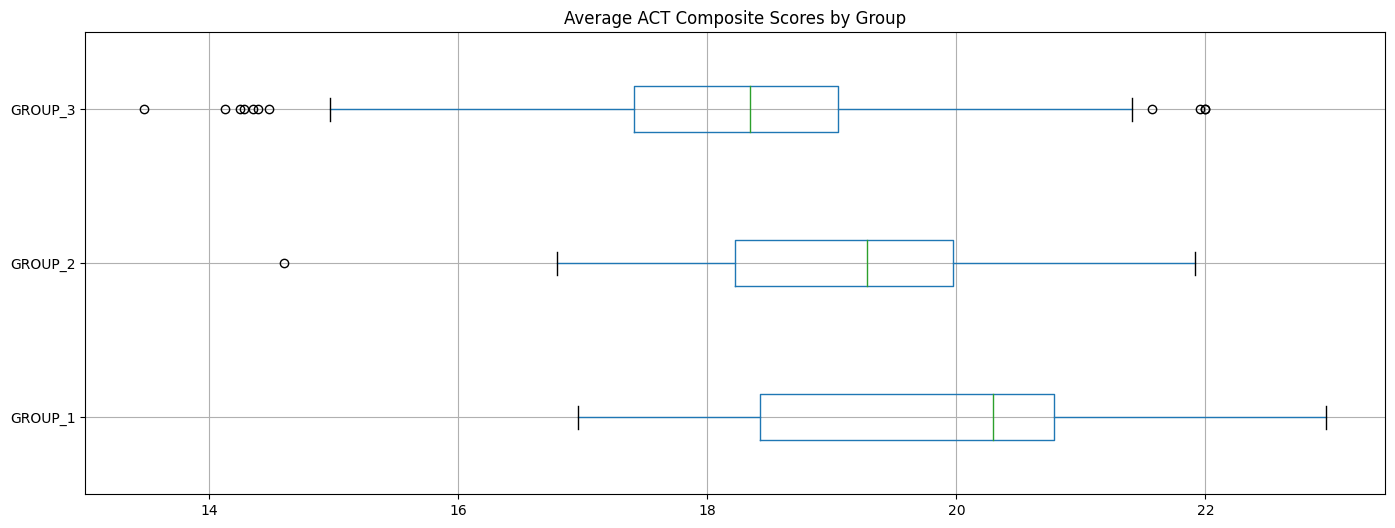

In [13]:
x = [GROUP_1['2122_ACT_COMP'],GROUP_2['2122_ACT_COMP'],GROUP_3['2122_ACT_COMP']]
df = pd.DataFrame(x, index=['GROUP_1', 'GROUP_2', 'GROUP_3'])

df.T.boxplot(vert=False, figsize=(20,6))
plt.title('Average ACT Composite Scores by Group')
plt.subplots_adjust(left=0.25)
plt.show()

<h1>Grades Served Plot</h1>

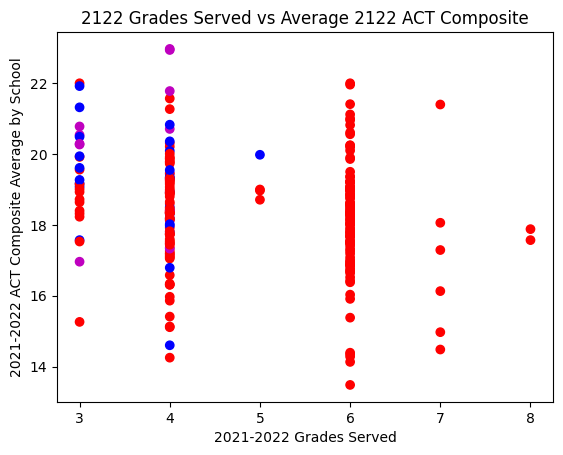

In [14]:
#grades served vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_GRADES']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Grades Served vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 Grades Served")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Create and Plot Enrollment Ratio</h1>

In [15]:
AR_HIGH_SCHOOLS['2122_ENR_RATIO'] = AR_HIGH_SCHOOLS['2122_ENROLLMENT']/AR_HIGH_SCHOOLS['2122_GRADES']
HS_NUM_ARRAY['2122_ENR_RATIO'] = HS_NUM_ARRAY['2122_ENROLLMENT']/HS_NUM_ARRAY['2122_GRADES']
CLUSTER_ARRAY['2122_ENR_RATIO'] = CLUSTER_ARRAY['2122_ENROLLMENT']/CLUSTER_ARRAY['2122_GRADES']
GROUP_1['2122_ENR_RATIO'] = GROUP_1['2122_ENROLLMENT']/GROUP_1['2122_GRADES']
GROUP_3['2122_ENR_RATIO'] = GROUP_2['2122_ENROLLMENT']/GROUP_2['2122_GRADES']
GROUP_3['2122_ENR_RATIO'] = GROUP_3['2122_ENROLLMENT']/GROUP_3['2122_GRADES']


<ipython-input-15-77d19318f0ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GROUP_1['2122_ENR_RATIO'] = GROUP_1['2122_ENROLLMENT']/GROUP_1['2122_GRADES']
<ipython-input-15-77d19318f0ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GROUP_3['2122_ENR_RATIO'] = GROUP_2['2122_ENROLLMENT']/GROUP_2['2122_GRADES']
<ipython-input-15-77d19318f0ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

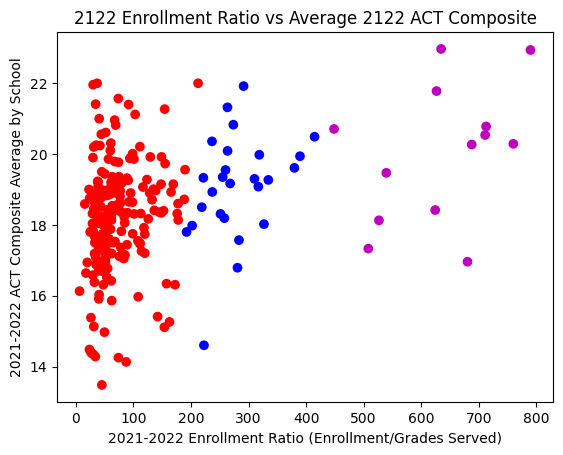

In [16]:
#Enrollment Ratio vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_ENR_RATIO']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Enrollment Ratio vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 Enrollment Ratio (Enrollment/Grades Served)")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Population that is Black Plot</h1>

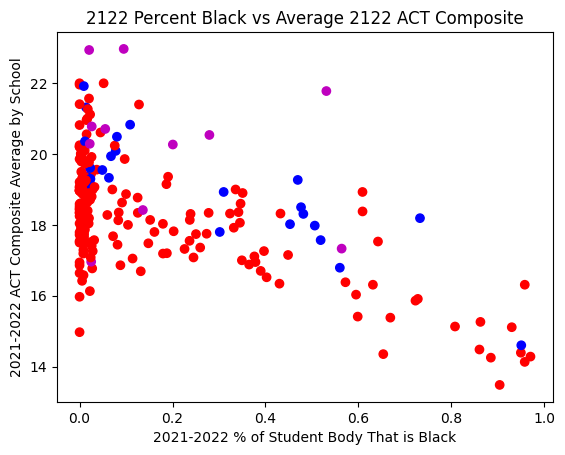

In [18]:
# % Black vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_POP_BLACK']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent Black vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body That is Black")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Population that is Hispanic</h1>

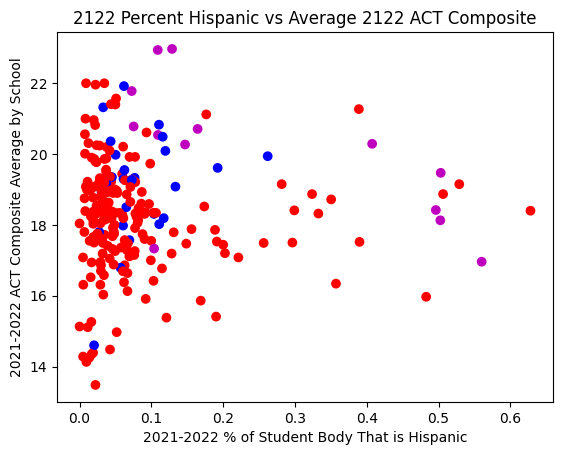

In [19]:
# % Hispanic vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_POP_HISP']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent Hispanic vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body That is Hispanic")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Population that is White</h1>

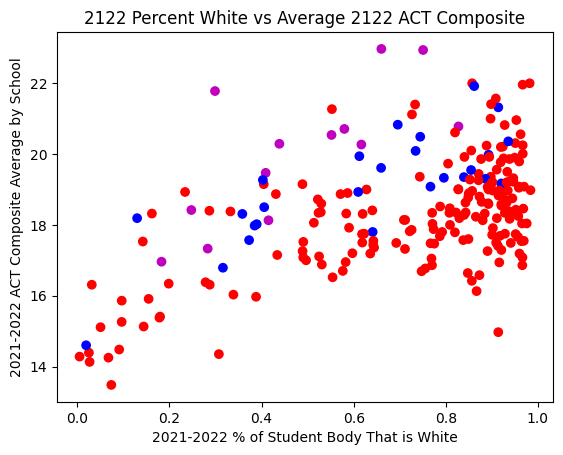

In [20]:
# % White vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_POP_WHITE']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent White vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body That is White")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Population with 504 Plans</h1>

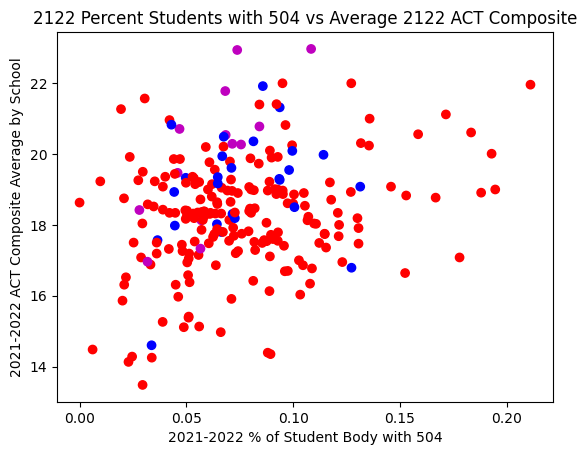

In [21]:
# % 504 vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_504']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent Students with 504 vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body with 504")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Population that are English Language Learners</h1>

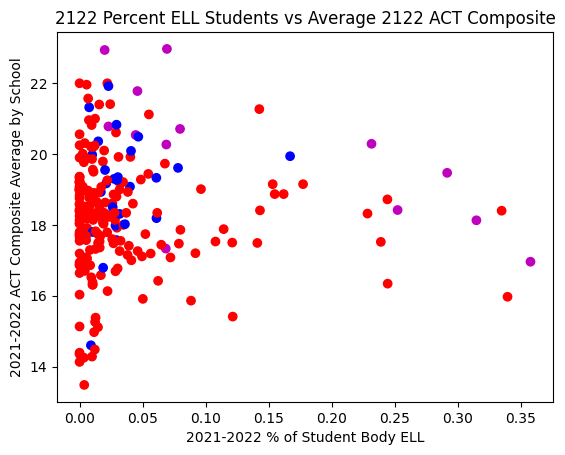

In [22]:
# % ELL vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_ELL']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent ELL Students vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body ELL")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Students Utilizing Special Education Services</h1>

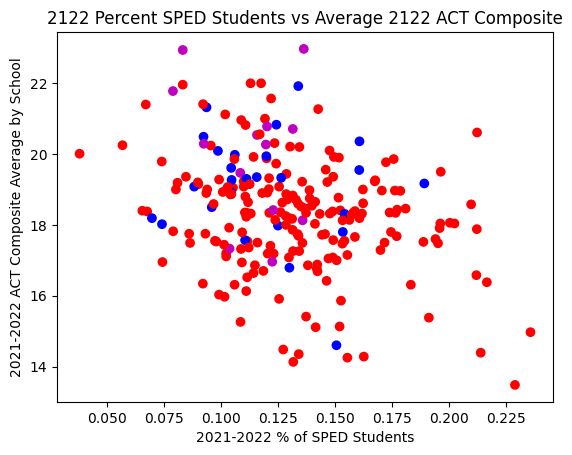

In [23]:
# % SPED vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_SPED']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent SPED Students vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of SPED Students")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Students Diagnosed with Dyslexia</h1>

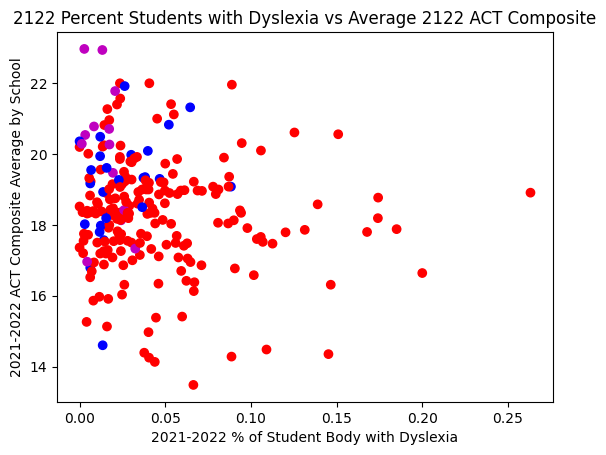

In [24]:
# % Dyslexia vs ACT Composite
AR_HIGH_SCHOOLS['2122_DYSLEXIA_PROP'] = AR_HIGH_SCHOOLS['2122_DYSLEXIA']/AR_HIGH_SCHOOLS['2122_ENROLLMENT']
x = AR_HIGH_SCHOOLS['2122_DYSLEXIA_PROP']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent Students with Dyslexia vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body with Dyslexia")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Body in Free/Reduced Lunch Program</h1>

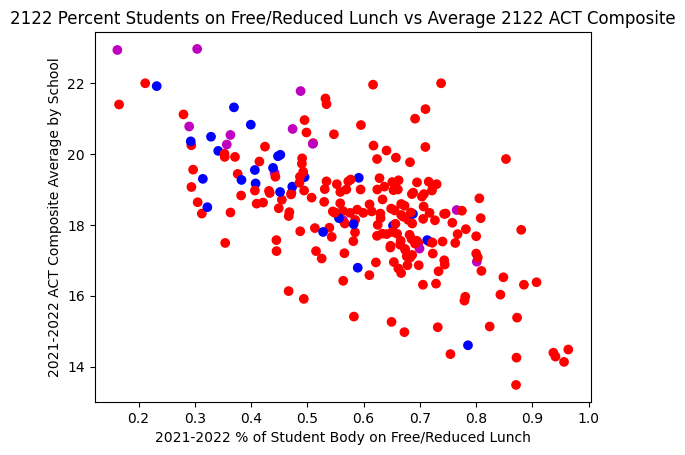

In [25]:
# % Free and Reduced Lunch vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_FREE_REDUCED']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Percent Students on Free/Reduced Lunch vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 % of Student Body on Free/Reduced Lunch")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>2021-2022 Number of Graduates</h1>

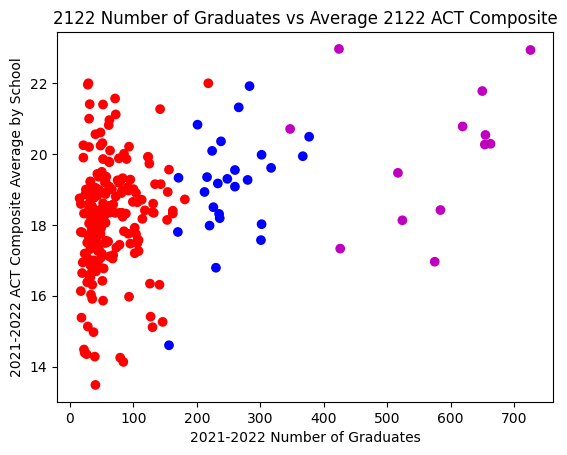

In [26]:
# Number of Graduates vs ACT Composite
x = AR_HIGH_SCHOOLS['2122_NUM_GRADUATES']
y = AR_HIGH_SCHOOLS['2122_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2122 Number of Graduates vs Average 2122 ACT Composite')
plt.xlabel("2021-2022 Number of Graduates")
plt.ylabel("2021-2022 ACT Composite Average by School")
plt.show()

<h1>Build Regression Model</h1>

In [28]:
LR_INPUT = AR_HIGH_SCHOOLS[['2122_GRADES','2122_ENR_RATIO','2122_FREE_REDUCED','2122_POP_BLACK','2122_POP_WHITE', '2122_SPED', '2122_504']]

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(LR_INPUT)
y = np.asanyarray(AR_HIGH_SCHOOLS['2122_ACT_COMP'])
regr.fit(x, y)
c = pd.DataFrame(zip(LR_INPUT.columns, regr.coef_))
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)
c

Coefficients:  [-2.69685692e-02  3.30894917e-03 -2.63659571e+00 -1.45165132e+00
  1.89808328e+00 -6.78295078e+00  2.10330980e+00]
Intercept:  19.30047895442095


,0,1
0,2122_GRADES,-0.026969
1,2122_ENR_RATIO,0.003309
2,2122_FREE_REDUCED,-2.636596
3,2122_POP_BLACK,-1.451651
4,2122_POP_WHITE,1.898083
5,2122_SPED,-6.782951
6,2122_504,2.103310


In [30]:
y_hat= regr.predict(LR_INPUT)
x = np.asanyarray(LR_INPUT)
y = np.asanyarray(AR_HIGH_SCHOOLS['2122_ACT_COMP'])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % regr.score(x, y))


/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 1.07
R^2: 0.61


<h1>Apply Models to Data Frames</h1>

In [31]:
AR_HIGH_SCHOOLS['2122_PREDICTION'] = pd.DataFrame(y_hat)
HS_NUM_ARRAY['2122_PREDICTION'] = pd.DataFrame(y_hat)
CLUSTER_ARRAY['2122_PREDICTION'] = pd.DataFrame(y_hat)
AR_HIGH_SCHOOLS['2122_RESIDUALS'] = AR_HIGH_SCHOOLS['2122_ACT_COMP'] - AR_HIGH_SCHOOLS['2122_PREDICTION']
HS_NUM_ARRAY['2122_RESIDUALS'] = AR_HIGH_SCHOOLS['2122_RESIDUALS']
CLUSTER_ARRAY['2122_RESIDUALS'] = AR_HIGH_SCHOOLS['2122_RESIDUALS']

<h1>Sort by Residuals to Rank and Display Top 10% of Ranked High Schools</h1>

In [33]:
RANKED_2122 = AR_HIGH_SCHOOLS[['LEA','SCHOOL_NAME','2122_RESIDUALS','2122_ACT_COMP','2122_GRADES','2122_ENR_RATIO','2122_POP_BLACK','2122_POP_WHITE', '2122_SPED', '2122_FREE_REDUCED','PRED_CLUSTERS']]
RANKED_2122 = RANKED_2122.sort_values(by=['2122_RESIDUALS','2122_ACT_COMP'], ascending=False)
RANKED_2122.reset_index(inplace=True)
RANKED_2122.head(23)

,index,LEA,SCHOOL_NAME,2122_RESIDUALS,2122_ACT_COMP,2122_GRADES,2122_ENR_RATIO,2122_POP_BLACK,2122_POP_WHITE,2122_SPED,2122_FREE_REDUCED,PRED_CLUSTERS
0,6,304022,Norfork High School,3.418338,22.00,6,36.833333,0.0000,0.9819,0.1176,0.7376,0
1,229,7504011,Dardanelle High School,3.341923,21.27,4,154.250000,0.0178,0.5527,0.1426,0.7099,0
2,99,3301002,Calico Rock High School,2.634187,21.96,6,30.000000,0.0000,0.9667,0.0833,0.6167,0
3,89,3001003,Bismarck High School,2.604985,21.57,4,73.750000,0.0203,0.9085,0.1220,0.5322,0
4,171,6001001,Central High School,2.397040,21.78,4,626.500000,0.5311,0.2989,0.0790,0.4880,1
5,71,2403012,County Line High School,2.395021,21.00,6,40.500000,0.0165,0.8971,0.1193,0.6914,0
6,122,4204019,Scranton High School,2.292462,21.41,6,34.333333,0.0000,0.8981,0.0922,0.5340,0
7,150,5301002,Bigelow High School,2.176789,20.61,6,51.833333,0.0450,0.8199,0.2122,0.4984,0
8,213,7203020,Fayetteville High School East,2.061609,22.97,4,634.500000,0.0950,0.6600,0.1363,0.3042,1
9,186,6205028,Palestine-Wheatley Senior High,1.885422,19.86,6,56.666667,0.0971,0.8765,0.1059,0.8529,0


<h1>Create Ranked Data Frame with Ranking</h1>

In [34]:
RANKED_2122['2122_RANK'] = RANKED_2122['2122_GRADES']
for i in range(0,232):
    RANKED_2122['2122_RANK'][i] = i + 1
SHOW_RANK_2122 = RANKED_2122[['2122_RANK', 'LEA','SCHOOL_NAME','2122_RESIDUALS','2122_ACT_COMP']]
SHOW_RANK_2122.head(23)

<ipython-input-34-aacbdea6ef37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RANKED_2122['2122_RANK'][i] = i + 1


,2122_RANK,LEA,SCHOOL_NAME,2122_RESIDUALS,2122_ACT_COMP
0,1,304022,Norfork High School,3.418338,22.00
1,2,7504011,Dardanelle High School,3.341923,21.27
2,3,3301002,Calico Rock High School,2.634187,21.96
3,4,3001003,Bismarck High School,2.604985,21.57
4,5,6001001,Central High School,2.397040,21.78
5,6,2403012,County Line High School,2.395021,21.00
6,7,4204019,Scranton High School,2.292462,21.41
7,8,5301002,Bigelow High School,2.176789,20.61
8,9,7203020,Fayetteville High School East,2.061609,22.97
9,10,6205028,Palestine-Wheatley Senior High,1.885422,19.86


<h1>Create CSV File of Rankings</h1>

In [35]:
SHOW_RANK_2122.to_csv('2122_AR_HIGH SCHOOL_RANKINGS.csv')

<h1>Determine Number of Schools that Beat Prediction</h1>

In [36]:
OUTPERFORMED = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2122_RESIDUALS'] > 0)]
UNDERPERFORMERS = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2122_RESIDUALS'] < 0)]
HIT = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2122_RESIDUALS'] == 0)]
print('Dimensions of HIT: ', HIT.shape)
print('Dimensions of OUTPERFORMED: ', OUTPERFORMED.shape)
print('Dimensions of UNDERPERFORMERS: ', UNDERPERFORMERS.shape)

Dimensions of HIT:  (0, 292)
Dimensions of OUTPERFORMED:  (111, 292)
Dimensions of UNDERPERFORMERS:  (121, 292)
